**Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**EDA Train Test Split**
The metadata of the tf records was captures from the frames. The tf records were split into train and eval based on metadata such as location, time of day and weather.

Each tf record file has around 199 images. The train set has 202 such tf records, the eval set has 72 such tfrecords.

Metadata has been extracted from frames contect from waymo data. The timeofday,location and weatehr has been extracted and this has been used to split the data into train and eval sets.

The pie charts in the notebook below show the composition of train and eval datasets.

The notebook has visualizations of ground truth images across locations, weather and time of day

In [75]:
import pandas as pd
path = '/content/drive/MyDrive/data_dir/train.csv'
df_train_meta= pd.read_csv(path,sep=',',header=None)
df_train_meta.columns = ['sno','fname','TimeofDay','location','weather','veh','ped','cyc','tot_frames']

In [76]:
import pandas as pd
path = '/content/drive/MyDrive/data_dir/eval.csv'
df_eval_meta= pd.read_csv(path,sep=',',header=None)
df_eval_meta.columns = ['sno','fname','TimeofDay','location','weather','veh','ped','cyc','tot_frames']

In [77]:
import glob
path= '/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/'
fn_train = glob.glob(path+'*.tfrecord')

In [78]:
import glob
path= '/content/drive/MyDrive/nd013-c1-vision-starter/data_new/eval/'
fn_eval = glob.glob(path+'*.tfrecord')

In [79]:
ltrain=[]
for f in fn_train:
  ltrain.append(f[62:])


In [80]:
leval=[]
for f in fn_eval:
  leval.append(f[61:])


In [81]:
df_train_meta=df_train_meta[df_train_meta.fname.isin(ltrain)]

In [82]:
df_eval_meta=df_eval_meta[df_eval_meta.fname.isin(leval)]

In [83]:
df_train_meta.head()

sno                                              fname  TimeofDay  \
1   1.0  segment-10023947602400723454_1120_000_1140_000...        Day   
2   7.0  segment-10082223140073588526_6140_000_6160_000...      Night   
3  10.0  segment-10107710434105775874_760_000_780_000_w...  Dawn/Dusk   
4  12.0  segment-10206293520369375008_2796_800_2816_800...      Night   
5  13.0  segment-10212406498497081993_5300_000_5320_000...  Dawn/Dusk   

       location weather   veh   ped cyc tot_frames  
1   location_sf   sunny  4462  3871  31        198  
2   location_sf   sunny  2799   539   0        196  
3   location_sf   sunny   621     0   0        198  
4  location_phx   sunny   881    78   0        197  
5   location_sf   sunny  3824   751   0        197

In [84]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
def df_plot(df,name,title_text):
  loc=(df.value_counts(subset=[name]))
  matplotlib.pyplot.pie(x=loc,labels=df.value_counts(subset=[name]).index)
  plt.title(title_text)

**Train Data Split Charts**
by
*   Time of Day
*   Weather
*   Location








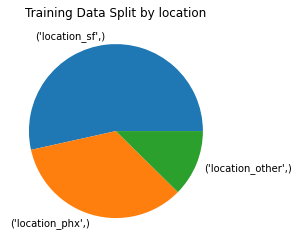

In [45]:
df_plot(df_train_meta,'location','Training Data Split by location')

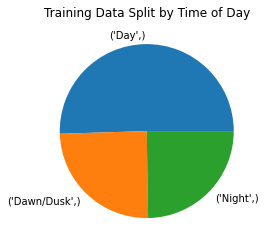

In [47]:
df_plot(df_train_meta,'TimeofDay','Training Data Split by Time of Day')

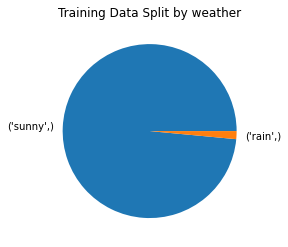

In [48]:
df_plot(df_train_meta,'weather','Training Data Split by weather')

**Evaluation Data Split Charts**
by
*   Time of Day
*   Weather
*   Location

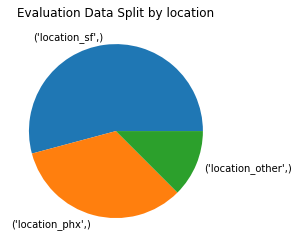

In [87]:
df_plot(df_eval_meta,'location','Evaluation Data Split by location')

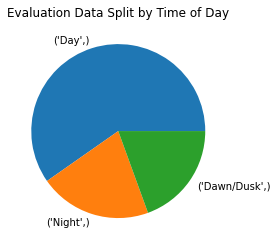

In [86]:
df_plot(df_eval_meta,'TimeofDay','Evaluation Data Split by Time of Day')

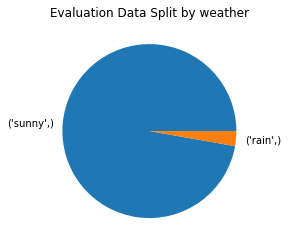

In [85]:
df_plot(df_eval_meta,'weather','Evaluation Data Split by weather')

In [ ]:
df[df['location']=='location_phx']

fname  TimeofDay  \
2    segment-1005081002024129653_5313_150_5333_150_...        Day   
5    segment-10072231702153043603_5725_000_5745_000...        Day   
11   segment-10153695247769592104_787_000_807_000_w...        Day   
12   segment-10206293520369375008_2796_800_2816_800...      Night   
14   segment-1022527355599519580_4866_960_4886_960_...        Day   
..                                                 ...        ...   
264  segment-16511546224219511043_6226_000_6246_000...  Dawn/Dusk   
266  segment-16552287303455735122_7587_380_7607_380...  Dawn/Dusk   
271  segment-16625429321676352815_1543_860_1563_860...        Day   
274  segment-16651261238721788858_2365_000_2385_000...        Day   
280  segment-16797668128356194527_2430_390_2450_390...  Dawn/Dusk   

         location weather   veh   ped  cyc  tot_frames  
2    location_phx   sunny  2799   272    0         198  
5    location_phx   sunny  1066    97    0         197  
11   location_phx   sunny  6411     0    0         197  
12   location_phx   sunny   881    78    0         197  
14   location_phx   sunny  4915  1790    0         197  
..            ...     ...   ...   ...  ...         ...  
264  location_phx    rain   922     0    0         198  
266  location_phx   sunny  3139   196    0         198  
271  location_phx   sunny  1117   301  252         198  
274  location_phx   sunny  6011     0    0         198  
280  location_phx   sunny  3230    26    0         198  

[120 rows x 8 columns]

In [ ]:
df[df['location']=='location_other']

fname  TimeofDay  \
51   segment-10975280749486260148_940_000_960_000_w...      Night   
53   segment-11017034898130016754_697_830_717_830_w...  Dawn/Dusk   
56   segment-11076364019363412893_1711_000_1731_000...        Day   
70   segment-11388947676680954806_5427_320_5447_320...        Day   
74   segment-11486225968269855324_92_000_112_000_wi...        Day   
99   segment-12200383401366682847_2552_140_2572_140...      Night   
106  segment-12303641360375776820_4378_000_4398_000...      Night   
113  segment-12473470522729755785_4000_000_4020_000...        Day   
115  segment-12511696717465549299_4209_630_4229_630...        Day   
118  segment-12566399510596872945_2078_320_2098_320...        Day   
127  segment-12894036666871194216_787_000_807_000_w...        Day   
136  segment-1305342127382455702_3720_000_3740_000_...        Day   
142  segment-13177337129001451839_9160_000_9180_000...        Day   
143  segment-13181198025433053194_2620_770_2640_770...        Day   
144  segment-13182548552824592684_4160_250_4180_250...        Day   
166  segment-13629997314951696814_1207_000_1227_000...      Night   
180  segment-13984577671034960830_4545_000_4565_000...      Night   
184  segment-14073578965827700743_1564_000_1584_000...        Day   
191  segment-14143054494855609923_4529_100_4549_100...        Day   
215  segment-14742731916935095621_1325_000_1345_000...        Day   
220  segment-14777753086917826209_4147_000_4167_000...        Day   
221  segment-14791260641858988448_1018_000_1038_000...        Day   
225  segment-14830022845193837364_3488_060_3508_060...        Day   
238  segment-1605912288178321742_451_000_471_000_wi...        Day   
241  segment-16093022852977039323_2981_100_3001_100...        Day   
245  segment-16153607877566142572_2262_000_2282_000...        Day   
256  segment-16372013171456210875_5631_040_5651_040...        Day   
259  segment-16435050660165962165_3635_310_3655_310...        Day   
273  segment-16646502593577530501_4878_080_4898_080...        Day   
278  segment-16735938448970076374_1126_430_1146_430...        Day   

           location weather   veh   ped  cyc  tot_frames  
51   location_other   sunny  1079     0    0         188  
53   location_other   sunny  1623    53   97         196  
56   location_other   sunny  1155     0    0         194  
70   location_other   sunny  5024  1208    0         197  
74   location_other   sunny  2570     9    0         198  
99   location_other   sunny  1326     0    0         198  
106  location_other   sunny  1854     0    0         198  
113  location_other   sunny  2144    64    0         198  
115  location_other   sunny  4479     0    0         196  
118  location_other   sunny  2731  3018    0         197  
127  location_other   sunny   130    65    0         197  
136  location_other   sunny  4325   143    0         198  
142  location_other   sunny  1778     0   25         199  
143  location_other   sunny   102     0    0         198  
144  location_other   sunny  6176   775   83         197  
166  location_other   sunny  3897   226    0         198  
180  location_other   sunny   456     0    0         197  
184  location_other   sunny  4263     0    0         198  
191  location_other   sunny  3876  1192  511         197  
215  location_other   sunny  1910     0    0         198  
220  location_other   sunny   555     0    0         198  
221  location_other   sunny  1714   392    0         196  
225  location_other   sunny  2521   191  199         198  
238  location_other   sunny  2577    66    0         196  
241  location_other   sunny  1701     0   68         197  
245  location_other   sunny  2978   111    0         198  
256  location_other   sunny   927   532   35         198  
259  location_other   sunny  1727   171    0         198  
273  location_other   sunny  2626   172    0         198  
278  location_other   sunny   666   124   55         197

In [ ]:
df[df['location']=='location_sf']

fname TimeofDay     location  \
0    segment-10017090168044687777_6380_000_6400_000...       Day  location_sf   
1    segment-10023947602400723454_1120_000_1140_000...       Day  location_sf   
3    segment-10061305430875486848_1080_000_1100_000...       Day  location_sf   
4    segment-10072140764565668044_4060_000_4080_000...       Day  location_sf   
6    segment-10075870402459732738_1060_000_1080_000...       Day  location_sf   
..                                                 ...       ...          ...   
279  segment-16793466851577046940_2800_000_2820_000...       Day  location_sf   
281  segment-16801666784196221098_2480_000_2500_000...       Day  location_sf   
282  segment-16873108320324977627_780_000_800_000_w...       Day  location_sf   
283  segment-16911037681440249335_700_000_720_000_w...       Day  location_sf   
284  segment-169115044301335945_480_000_500_000_wit...       Day  location_sf   

    weather    veh   ped  cyc  tot_frames  
0     sunny   2127     0    0         197  
1     sunny   4462  3871   31         198  
3     sunny   2052   109    0         197  
4     sunny  10226  1281    0         197  
6     sunny   2856     0    0         198  
..      ...    ...   ...  ...         ...  
279   sunny   7900  5079    0         197  
281   sunny   1853    98   55         198  
282   sunny   5515  5109   87         198  
283   sunny   1931    22    0         198  
284   sunny   4082  2796   14         197  

[135 rows x 8 columns]

**Ground Truth Image Visualization**
*Across location, weather & time of day*

INFO:tensorflow:Reading unweighted datasets: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-10975280749486260148_940_000_960_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-10975280749486260148_940_000_960_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


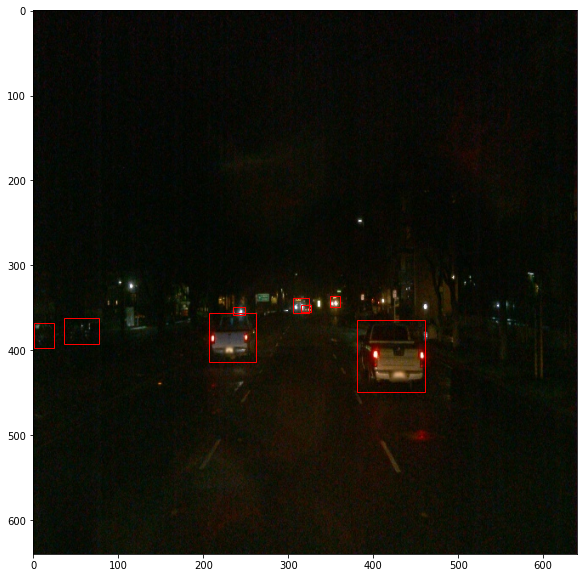

In [62]:
#Night image Location Phx in train set
tfrec_path='segment-10975280749486260148_940_000_960_000_with_camera_labels.tfrecord'
tfrec_path='/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/'+tfrec_path
render_images(tfrec_path)

INFO:tensorflow:Reading unweighted datasets: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-10676267326664322837_311_180_331_180_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-10676267326664322837_311_180_331_180_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


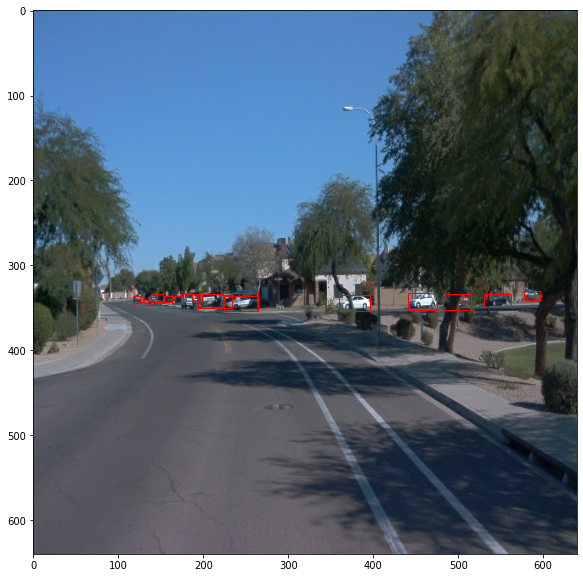

In [63]:
#Day image Location Phx in train set
tfrec_path='segment-10676267326664322837_311_180_331_180_with_camera_labels.tfrecord'
tfrec_path='/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/'+tfrec_path
render_images(tfrec_path)

INFO:tensorflow:Reading unweighted datasets: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-11355519273066561009_5323_000_5343_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-11355519273066561009_5323_000_5343_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


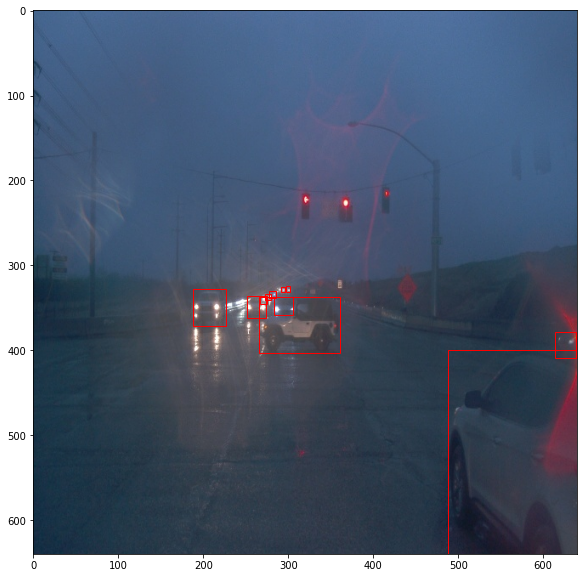

In [64]:
#Dawn-Dusk image Location Phx
tfrec_path='segment-11355519273066561009_5323_000_5343_000_with_camera_labels.tfrecord'
tfrec_path='/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/'+tfrec_path
render_images(tfrec_path)

INFO:tensorflow:Reading unweighted datasets: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-13830510593707564159_5575_000_5595_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-13830510593707564159_5575_000_5595_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


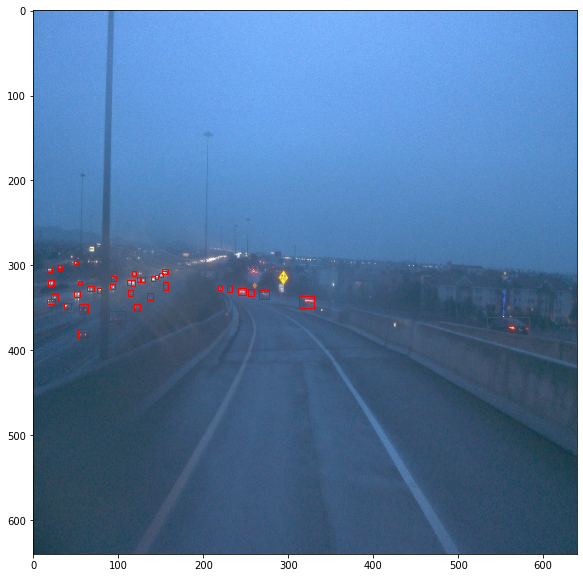

In [65]:
#Rain dawn/Dusk Location Phx
tfrec_path='segment-13830510593707564159_5575_000_5595_000_with_camera_labels.tfrecord'
tfrec_path='/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/'+tfrec_path
render_images(tfrec_path)

INFO:tensorflow:Reading unweighted datasets: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-10231929575853664160_1160_000_1180_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-10231929575853664160_1160_000_1180_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


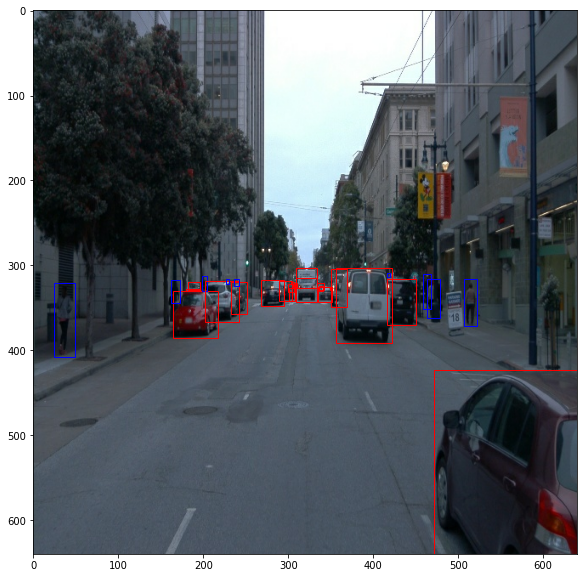

In [66]:
#Day Location SF
tfrec_path='segment-10231929575853664160_1160_000_1180_000_with_camera_labels.tfrecord'
tfrec_path='/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/'+tfrec_path
render_images(tfrec_path)

INFO:tensorflow:Reading unweighted datasets: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-11971497357570544465_1200_000_1220_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-11971497357570544465_1200_000_1220_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


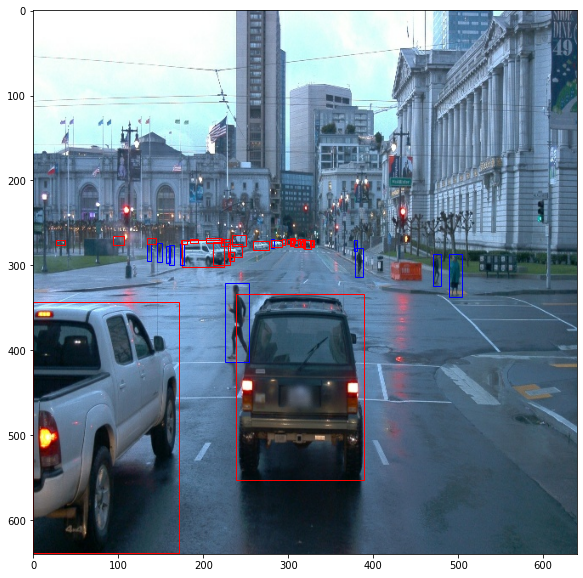

In [68]:
#Dawn/Dusk Location_SF
tfrec_path='segment-11971497357570544465_1200_000_1220_000_with_camera_labels.tfrecord'
tfrec_path='/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/'+tfrec_path
render_images(tfrec_path)

INFO:tensorflow:Reading unweighted datasets: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-10082223140073588526_6140_000_6160_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-10082223140073588526_6140_000_6160_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


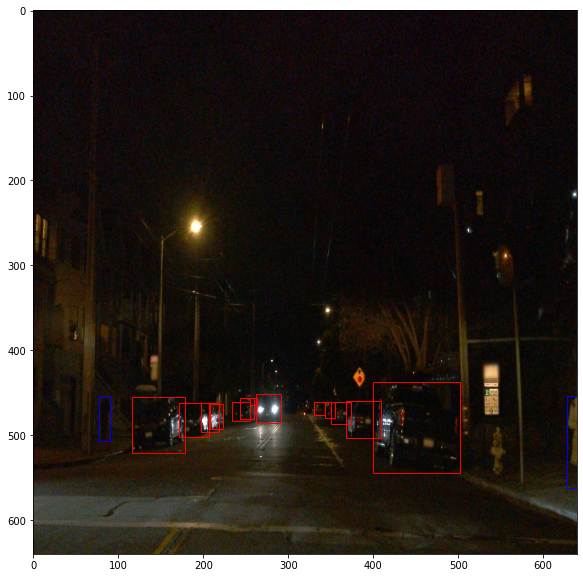

In [69]:
#Night time Location_SF
tfrec_path='segment-10082223140073588526_6140_000_6160_000_with_camera_labels.tfrecord'
tfrec_path='/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/'+tfrec_path
render_images(tfrec_path)

INFO:tensorflow:Reading unweighted datasets: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-3698685523057788592_4303_630_4323_630_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-3698685523057788592_4303_630_4323_630_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


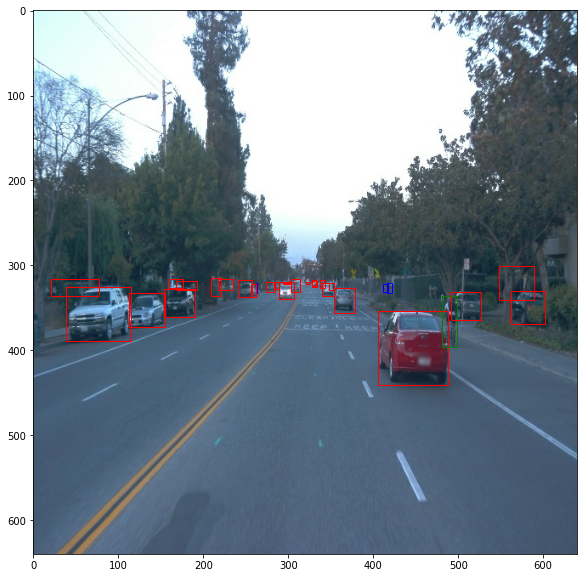

In [70]:
#Dawn/Dusk Location_other
tfrec_path='segment-3698685523057788592_4303_630_4323_630_with_camera_labels.tfrecord'
tfrec_path='/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/'+tfrec_path
render_images(tfrec_path)

INFO:tensorflow:Reading unweighted datasets: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-3461228720457810721_4511_120_4531_120_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-3461228720457810721_4511_120_4531_120_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


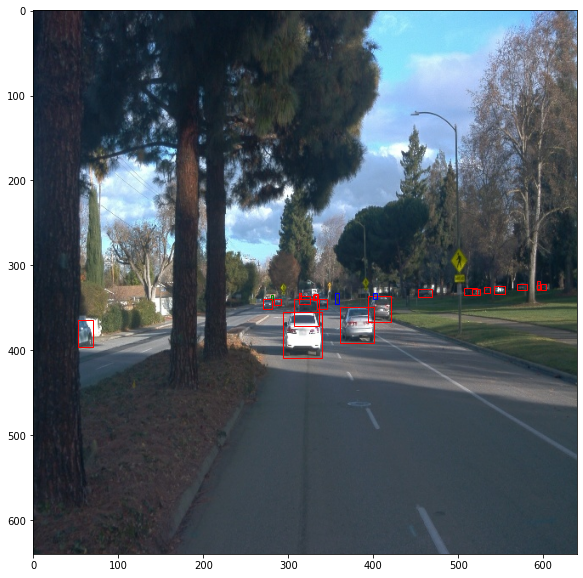

In [71]:
#Day time Location_other
tfrec_path='segment-3461228720457810721_4511_120_4531_120_with_camera_labels.tfrecord'
tfrec_path='/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/'+tfrec_path
render_images(tfrec_path)

INFO:tensorflow:Reading unweighted datasets: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-17782258508241656695_1354_000_1374_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-17782258508241656695_1354_000_1374_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


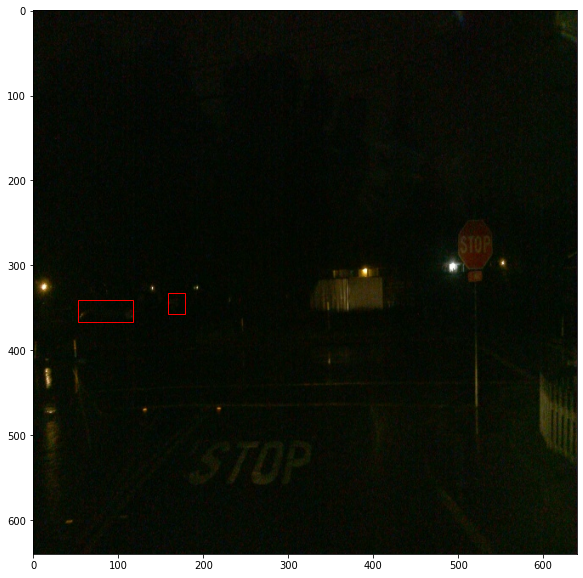

In [73]:
#Night time location_other
tfrec_path='segment-17782258508241656695_1354_000_1374_000_with_camera_labels.tfrecord'
tfrec_path='/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/'+tfrec_path
render_images(tfrec_path)

**TFOD Installation**

In [53]:
%cd /content/drive/MyDrive/new/TensorFlow/models/research/
!protoc object_detection/protos/*.proto --python_out=.
# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

/content/drive/MyDrive/new/TensorFlow/models/research
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/drive/MyDrive/new/TensorFlow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.9 MB 3.9 MB/s 
     |████████████████████████████████| 352 kB 59.1 MB/s 
     |████████████████████████████████| 665.5 MB 23 kB/s 
     |████████████████████████████████| 1.8 MB 47.0 MB/s 
     |████████████████████████████████| 23.1 MB 790 kB/s 
     |████████████████████████████████| 463 kB 41.2 MB/s 
     |████████████████████████████████

**Additional libraries reinstalled to adjust version**

In [54]:
!pip uninstall opencv-python-headless==4.5.5.62
!pip install opencv-python-headless==4.5.2.52

Found existing installation: opencv-python-headless 4.6.0.66
Uninstalling opencv-python-headless-4.6.0.66:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.6.0.66.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-5896f664.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-d21001fc.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

**Routines to support Ground Truth Visualizations above**

In [61]:
%matplotlib inline
from matplotlib.patches import Rectangle
from matplotlib.text import Text

def recenter_image(image):
    # ssd preprocessing
    #image += [123.68, 116.779, 103.939]
    return image

def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    w, h, _ = image.shape
    # resize the bboxes
    #bboxes[:, [0, 2]] *= w
    #bboxes[:, [1, 3]] *= h

    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image.astype(np.uint8))

    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb        
        if cl==1:
          color='r'
        elif cl==2:
          color='b'
        elif cl==4:
          color='g'
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor=color, linewidth=1)
        ax.add_patch(rec)
    plt.show()

def display_batch(batch):
    # get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    #print(batched_bboxes.shape)
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
      #print(batched_bboxes[idx, :num_bboxes[idx], :])
      display_instances(batched_images[idx, ...], batched_bboxes[idx, :num_bboxes[idx], :], batched_classes[idx, ...])


In [60]:
from object_detection.core import standard_fields
from object_detection.metrics import coco_evaluation
from object_detection.utils import tf_version
import time
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from matplotlib import animation
from object_detection.builders.dataset_builder import build as build_dataset
from object_detection.utils.config_util import get_configs_from_pipeline_file
from object_detection.utils.label_map_util import create_category_index_from_labelmap
from object_detection.utils import visualization_utils as viz_utils

%matplotlib inline
def _get_categories_list():
  return [{
      'id': 1,
      'name': 'vehicle'
  }, {
      'id': 2,
      'name': 'pedestrian'
  },{
      'id': 3,
      'name': 'dummy'
  }, {
      'id': 4,
      'name': 'cyclist'
  }]
%cd /content/drive/MyDrive/nd013-c1-vision-starter/

def render_images(tfrec_path):

  label_map_path  = '/content/drive/MyDrive/nd013-c1-vision-starter/label_map.pbtxt'
  config_path ='/content/drive/MyDrive/nd013-c1-vision-starter/experiments/exp1/training/reference/exp1_pipeline.config'
  saved_model_path = '/content/drive/MyDrive/nd013-c1-vision-starter/experiments/exp1/training/reference/exported_model/saved_model'

  coco_evaluator = coco_evaluation.CocoDetectionEvaluator(_get_categories_list(),include_metrics_per_category=True,all_metrics_per_category=True)
  detect_fn = tf.saved_model.load(saved_model_path)

  # open config file
  configs = get_configs_from_pipeline_file(config_path)
  eval_config = configs['eval_config']
  eval_input_config = configs['eval_input_config']
  model_config = configs['model']

  # update the eval config file
  tf_rec_path=tfrec_path
  eval_input_config.tf_record_input_reader.input_path[:] = [tf_rec_path]
  dataset = build_dataset(eval_input_config)

  for idx, batch in enumerate(dataset):
    if idx==1:
      input_tensor = batch['image']
      image_np = input_tensor.numpy().astype(np.uint8)
      input_tensor = input_tensor[tf.newaxis, ...]
      gt_bb = batch['groundtruth_boxes'].numpy()*640
      gt_cls = batch['groundtruth_classes'].numpy()

      display_instances(image_np,gt_bb ,gt_cls)
  

/content/drive/MyDrive/nd013-c1-vision-starter
